# Vehicle Insurance Prediction Using Machine Learning


## 1. Problem Satement and Summary

> Predicting Customer Response to Vehicle Insurance Offers

> An `Insurance` company has collected data on customers who were approached with vehicle insurance offers
This notebook looks into using various Python-Based Machine Learning and Data Science libraries in an attempt to build a Machine Learning model capable of predicting whether or not an individual will respond positively to a vehicle insurance offer.

## 2. Data 
> The Data came form my Data Science learning institute (BIA) as the capstone project dataset assigned by `Mahaveer Sahu` (Trainer)

## 3. Evaluation 
> The sucess of the model will be measured by it's accuracy in predicting customer response. 

## 4. Features 
> This is where you'll get different information about each of the features in our data :

**Data Dictionary :**

**ID**: It serves as a unique identifier for each data entry.

**Gender**: The “Gender” column indicates the gender of individuals, with entries including both “Male” and “Female.”

**Age**: This column shows the age of individuals.

**Driving License**: The “Driving License” column contains binary data represented by ‘1’, indicating that all listed individuals possess a driving license

**Region Code**: This column displays numerical codes representing different regions. The numbers vary, suggesting that the individuals are from diverse areas

**Previously Insured**: In this column, binary data is used to indicate whether (‘1’) or not (‘0’) an individual was previously insured

**Vehicle Age**: This column categorizes vehicles into three age groups: less than one year (“<1 Year”), one to two years (“1-2 Year”), and over two years (“>2 Years”).

**Vehicle Damage Column**: It uses ‘Yes’ and ‘No’ entries to indicate whether the vehicle has experienced damage in the past

**Annual Premium**:  This numerical data represents the annual premium amounts paid by individuals for their insurance policies. The values vary widely among different entries.

**Policy Sales Channel**: Represented by numerical values, this column indicates various channels through which insurance policies were sold.

**Vintage**: Vintage refers to the number of days an individual has been associated with the insurance company.

**Response**: Binary data in this final column indicates whether (‘1’) or not (‘0’) an individual is interested in a vehicle insurance offer.

**Response column is our target variable**


## Key Questions :

1. What are the differrent features that affect the `Response` column ?
2. How can we effectively use the available data to predict whether an individual will be intrested in purchasing insurance ?
3. Which machine learning algorithm is suitable for this classification problem ?

 

## Tools we are going to use in this Notebook

1. Pandas, Numpy, MatlplotLib and Seaborn for data analysis, preprocessing and manipulation
2. From SciKit-Learn Library we use `RandomForestClassifier`, `LogisticRegression`, `GradientBoostingClassifier`, `KNeighborsClassifier`, & `DecisionTreeClassifier` for Modelling and we will select the best model after the evaluation 

### Standard Imports :
(We will import more libraries in future if needed)

In [59]:
# For Data Analysis and Manipulation
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# We need out plots to appear inside the notebook
%matplotlib inline

# Models form SciKit-Learn 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# For Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import stats

# For Evaluation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Load the data

In [60]:
data = pd.read_csv("customer_response.csv")
data.head().T

,0,1,2,3,4
id,1,2,3,4,5
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28,3,28,11,41
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454,33536,38294,28619,27496
Policy_Sales_Channel,26,26,26,152,152


In [61]:
data_column_names = {"id",                  
                     "Gender",           
                     "Age",             
                     "Driving_License",
                     "Region_Code",
                     "Previously_Insured",
                     "Vehicle_Age",
                     "Vehicle_Damage",
                     "Annual_Premium",
                     "Policy_Sales_Channel",
                     "Vintage ",
                     "Response"}

# Part 1 `DATA ANALYSIS`

In [62]:
# No. of rows and columns 
data.shape

(381109, 12)

In [63]:
data.head(8)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
5,6,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0
6,7,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0
7,8,Female,56,1,28,0,1-2 Year,Yes,32031,26,72,1


**1.We can delete the `id` column as it is not usefull for modelling but we will do it later in the preprocessing step**

In [64]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


#### Check for Object columns 

In [65]:
object_column = data.select_dtypes(include=['object']).columns
object_column

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

**There are only 3 columns which is of Object datatype i.e string**
1. Gender
2. Vehicle_Age
3. Vehicle_Damage
 
>`Gender` `Vehicle_Age` & `Vehicle_Damage` are Categorical features (Use One_Hot_Encoder)

 

**Check for Null values**

In [66]:
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Statistical Summary**

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


### Create a value counting function so that we don't repeat the code 
**Let's create a function to find the value counts for the specified columns and put it in a dataframe so that we can get better understanding of our dataset**

In [68]:
# Defining the Function
def get_column_val_counts(df, column_name):
    
    val_counts_df = data[column_name].value_counts().reset_index() # This variable stores the column's value counts and resets the index
    val_counts_df.columns = ["Value", "Count"]
    
    return val_counts_df
    """
    Get value counts for a specified column in a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column for which value counts are to be calculated.

    Returns:
        DataFrame: A DataFrame containing the value counts for the specified column.
    """

In [69]:
for column_name in data.columns: # Loop through the data columns
    print("Column :", column_name)
    print(get_column_val_counts(data, column_name)) # Calling the function and printing it.
    print()
    
# Click the bar below to see the output for all column's value counts

Column : id
         Value  Count
0            1      1
1       254071      1
2       254080      1
3       254079      1
4       254078      1
...        ...    ...
381104  127035      1
381105  127034      1
381106  127033      1
381107  127032      1
381108  381109      1

[381109 rows x 2 columns]

Column : Gender
    Value   Count
0    Male  206089
1  Female  175020

Column : Age
    Value  Count
0      24  25960
1      23  24256
2      22  20964
3      25  20636
4      21  16457
..    ...    ...
61     81     56
62     82     29
63     83     22
64     84     11
65     85     11

[66 rows x 2 columns]

Column : Driving_License
   Value   Count
0      1  380297
1      0     812

Column : Region_Code
    Value   Count
0      28  106415
1       8   33877
2      46   19749
3      41   18263
4      15   13308
5      30   12191
6      29   11065
7      50   10243
8       3    9251
9      11    9232
10     36    8797
11     33    7654
12     47    7436
13     35    6942
14      6    628

# EDA (Exploratory Data Analysis)

### Checking for Class Imbalance

### Important notes:
1. Gender (Male, Female)
2. Vehicle Age (<1 Year, 1-2 Year, >2 Years)
3. Vehicle Damage (Yes, No)
4. Driving License (0, 1)
5. Previously Insured (0, 1)
6. Response (0, 1)
> These columns are classes and categories

**We can see these column in a bar graph**

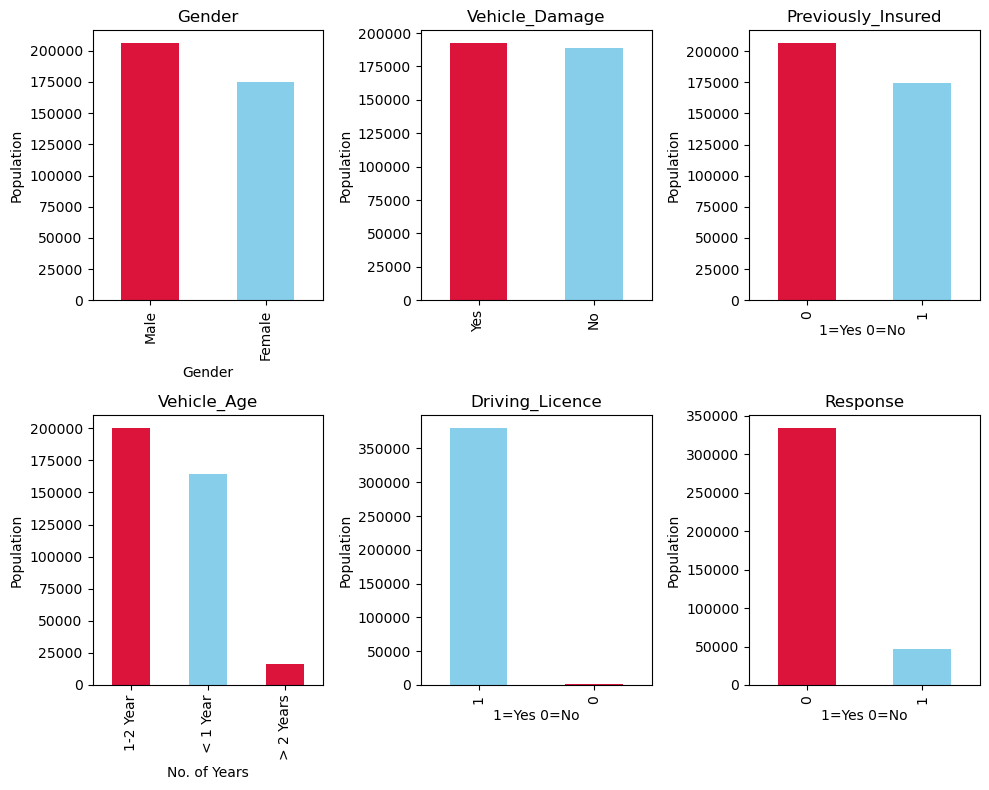

In [70]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# Plot 1 (Gender)
data["Gender"].value_counts().plot(kind="bar", color=["crimson", "skyblue"], ax=ax1)
ax1.set_title("Gender")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Population")

# Plot 2 (Vehicle_Damage)
data["Vehicle_Damage"].value_counts().plot(kind="bar", color=["crimson", "skyblue"], ax=ax2)
ax2.set_title("Vehicle_Damage")
ax2.set_ylabel("Population")

# Plot 3 (Previously_Insured)
data["Previously_Insured"].value_counts().plot(kind="bar", color=["crimson", "skyblue"], ax=ax3)
ax3.set_title("Previously_Insured")
ax3.set_xlabel("1=Yes 0=No ")
ax3.set_ylabel("Population")

# Plot 4 (Vehicle_Age)
data["Vehicle_Age"].value_counts().plot(kind="bar", color=["crimson", "skyblue"], ax=ax4)
ax4.set_title("Vehicle_Age")
ax4.set_xlabel("No. of Years")
ax4.set_ylabel("Population")

# Plot 5 (Driving_Licence)
data["Driving_License"].value_counts().plot(kind="bar", color=["skyblue", "crimson"], ax=ax5)
ax5.set_title("Driving_Licence")
ax5.set_xlabel("1=Yes 0=No")
ax5.set_ylabel("Population")

# Plot 6 (Response)
data["Response"].value_counts().plot(kind="bar", color=["crimson", "skyblue"], ax=ax6)
ax6.set_title("Response")
ax6.set_xlabel("1=Yes 0=No")
ax6.set_ylabel("Population")

# Show the plot
plt.tight_layout()
plt.show()

**Note :** As we can see that in the `vehicle_age`, `driving_license` and `response` column there is a class imbalance. We can use some concepts like SMOTE etc.,

### My function to plot Histograms

In [71]:
def plot_hist(column, x, y, title, figSize):
    plt.figure(figsize = figSize)
    plt.hist(data[column], color = "skyblue", edgecolor = "black")
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.title(f"Histogram for {title} Distribution")
    return plt.show()

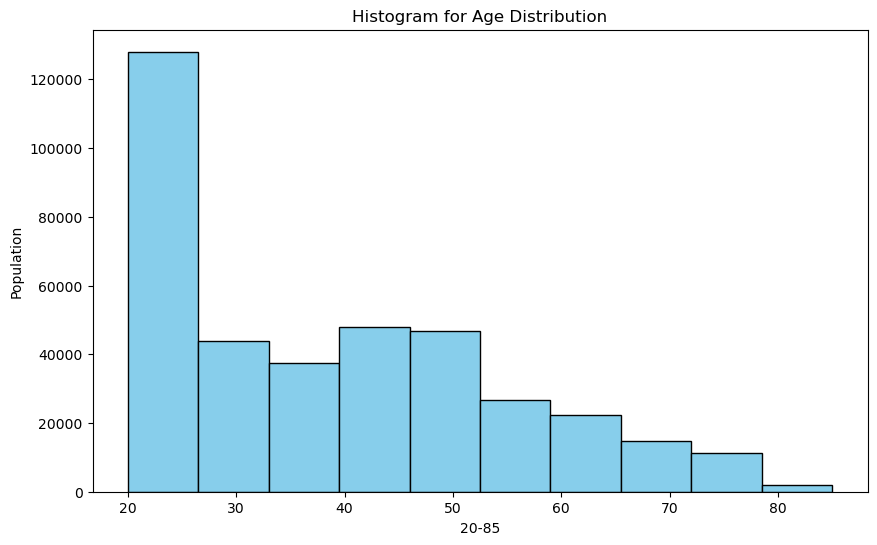

In [72]:
plot_hist(column="Age", x="20-85", y="Population", title="Age", figSize=(10,6))

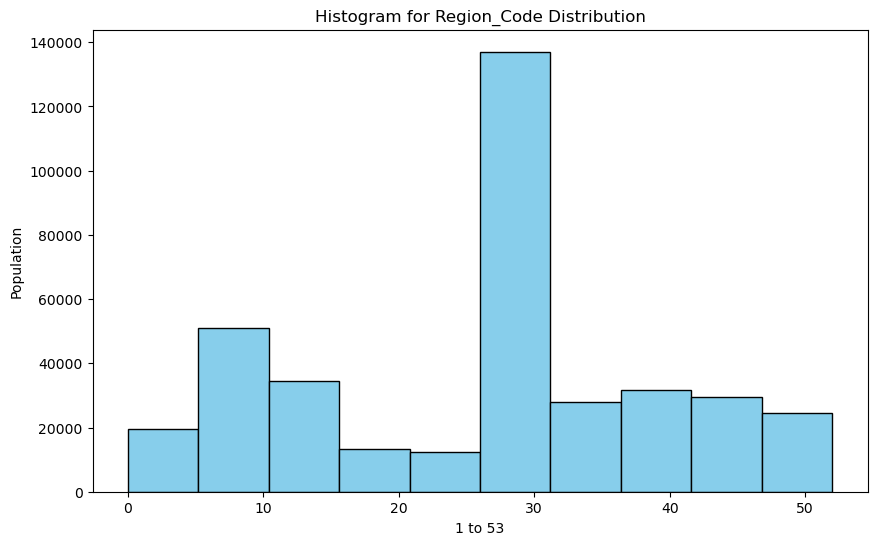

In [73]:
plot_hist(column="Region_Code", x="1 to 53",y="Population", title="Region_Code", figSize=(10,6))

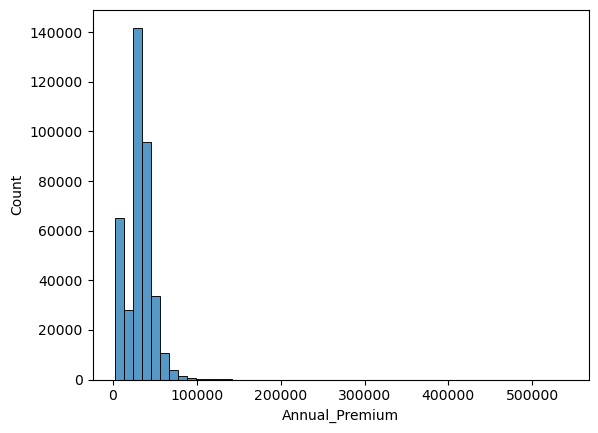

In [74]:
sns.histplot(data["Annual_Premium"], bins=50);

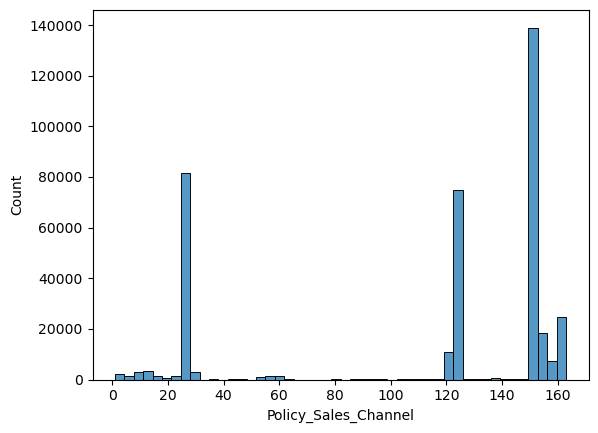

In [75]:
sns.histplot(data["Policy_Sales_Channel"]);

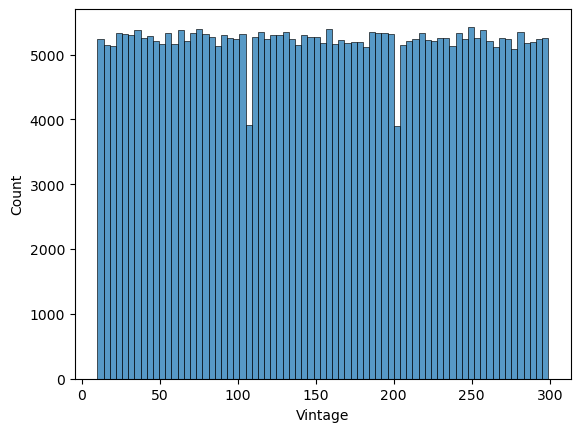

In [76]:
sns.histplot(data["Vintage"]);

### Summary Statistics

In [77]:
for column_name in data.select_dtypes(include='number').columns:
    # Calculate summary statistics for the column
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()
    std_deviation = data[column_name].std()
    min_value = data[column_name].min()
    max_value = data[column_name].max()
    
    # Print the summary statistics
    print(f"Summary statistics for column '{column_name}':")
    print("------------------------------------------------")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_deviation}")
    print(f"Minimum Value: {min_value}")
    print(f"Maximum Value: {max_value}")
    print() 

# Click below to view the outputs

Summary statistics for column 'id':
------------------------------------------------
Mean: 190555.0
Median: 190555.0
Standard Deviation: 110016.83620776715
Minimum Value: 1
Maximum Value: 381109

Summary statistics for column 'Age':
------------------------------------------------
Mean: 38.822583565331705
Median: 36.0
Standard Deviation: 15.511611018090681
Minimum Value: 20
Maximum Value: 85

Summary statistics for column 'Driving_License':
------------------------------------------------
Mean: 0.9978693759528114
Median: 1.0
Standard Deviation: 0.04610954420800161
Minimum Value: 0
Maximum Value: 1

Summary statistics for column 'Region_Code':
------------------------------------------------
Mean: 26.388807401557035
Median: 28.0
Standard Deviation: 13.229888025781639
Minimum Value: 0
Maximum Value: 52

Summary statistics for column 'Previously_Insured':
------------------------------------------------
Mean: 0.4582101183650871
Median: 0.0
Standard Deviation: 0.49825119888769953
Minimum V

### Class Imbalance Ratio for target column (Response)

In [78]:
class_counts = data["Response"].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 7.15904517233997


### Checking for Skewness

In [79]:
skewness = {"Age" : data["Age"].skew(),
            "Driving_License" : data["Driving_License"].skew(),
            "Region_Code" : data["Region_Code"].skew(),
            "Annual_Premium" : data["Annual_Premium"].skew(),
            "Policy_Sales_Channel" : data["Policy_Sales_Channel"].skew(),
            "Vintage" : data["Vintage"].skew(),
            "Response" : data["Response"].skew()}

In [80]:
skew = pd.DataFrame(skewness, index = [1])
skew

,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,0.672539,-21.595182,-0.115266,1.766087,-0.900008,0.00303,2.301906


The following columns are Right Skewed
1. Age
2. Annual_Premium
3. Response

The following columns are Left Skewed
1. Driving_License
2. Region_Code
3. Policy_Sales_Channel

The objective is try to fit all the feature and also target columns in a `Gaussian Distribution`

**Before that we will do some more data analysis so that we are confident before data preprocessing** 

**Find Unique Values**

In [81]:
for column in data.columns:
    unique_values = data[column].unique()
    num_unique_values = len(unique_values)
    
    # Print column name
    print(f"Column '{column}':")
    
    # Print unique values
    print(unique_values)
    
    # Print number of unique values
    print("Number of unique values:", num_unique_values)
    print()
# Click below to view all the column's unique values

Column 'id':
[     1      2      3 ... 381107 381108 381109]
Number of unique values: 381109

Column 'Gender':
['Male' 'Female']
Number of unique values: 2

Column 'Age':
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Number of unique values: 66

Column 'Driving_License':
[1 0]
Number of unique values: 2

Column 'Region_Code':
[28  3 11 41 33  6 35 50 15 45  8 36 30 26 16 47 48 19 39 23 37  5 17  2
  7 29 46 27 25 13 18 20 49 22 44  0  9 31 12 34 21 10 14 38 24 40 43 32
  4 51 42  1 52]
Number of unique values: 53

Column 'Previously_Insured':
[0 1]
Number of unique values: 2

Column 'Vehicle_Age':
['> 2 Years' '1-2 Year' '< 1 Year']
Number of unique values: 3

Column 'Vehicle_Damage':
['Yes' 'No']
Number of unique values: 2

Column 'Annual_Premium':
[ 40454  33536  38294 ...  20706 101664  69845]
Number of unique values: 48838

Colu

**Remove Duplicate Records if Any**

In [82]:
# Remove duplicate records based on all columns
data_without_duplicates = data.drop_duplicates()

# Print the DataFrame without duplicates
print(data_without_duplicates)

# Click below to view the output

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1           28                   0   
1            2    Male   76                1            3                   0   
2            3    Male   47                1           28                   0   
3            4    Male   21                1           11                   1   
4            5  Female   29                1           41                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1           26                   1   
381105  381106    Male   30                1           37                   1   
381106  381107    Male   21                1           30                   1   
381107  381108  Female   68                1           14                   0   
381108  381109    Male   46                1           29                   0   

       Vehicle_Age Vehicle_

In [83]:
data.shape

(381109, 12)

In [84]:
data_without_duplicates.shape

(381109, 12)

**Note : There are no duplicate values**

### Box Plots to check for `Outliers`

In [85]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [86]:
# Function for box plot where we can give our own parameters on data and column names
def plot_boxplot(df, column_name):
    """
    Plot a box plot for the specified column in the DataFrame using Seaborn.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column for which to plot the box plot.
    """
    plt.figure(figsize=(5, 4))  # Set the size of the plot
    
    # Create a box plot for the specified column
    sns.boxplot(x=df[column_name])
    
    # Add labels and title
    plt.xlabel(f'{column_name}')
    plt.ylabel('Values')
    plt.title(f'Box plot of {column_name}')
    
    # Show the plot
    plt.show()

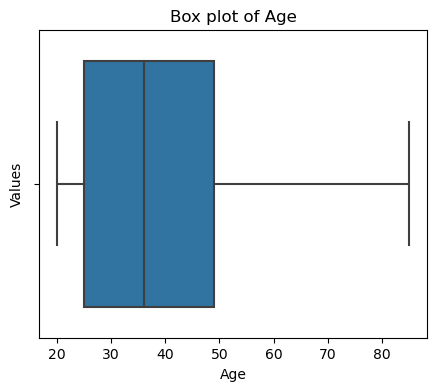

In [87]:
plot_boxplot(df=data, column_name='Age')

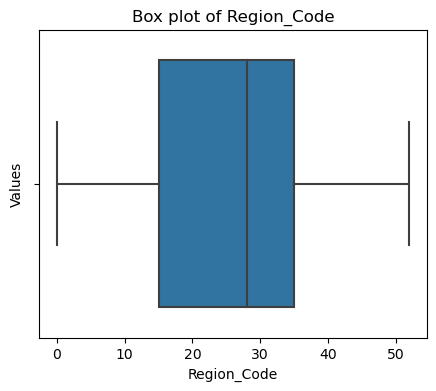

In [88]:
plot_boxplot(df=data, column_name='Region_Code')

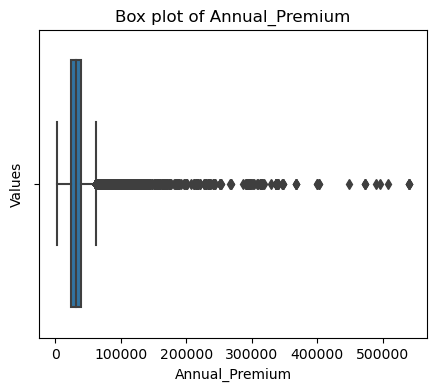

In [89]:
plot_boxplot(df=data, column_name='Annual_Premium')

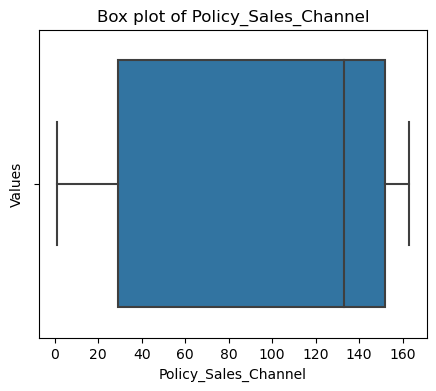

In [90]:
plot_boxplot(df=data, column_name='Policy_Sales_Channel')

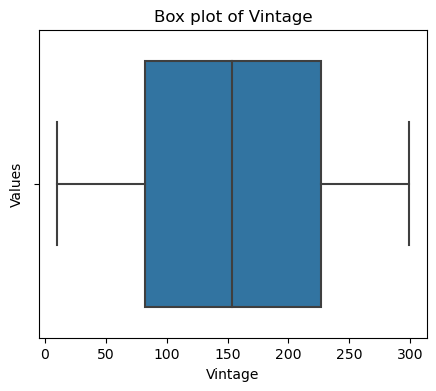

In [91]:
plot_boxplot(df=data, column_name='Vintage')

In [92]:
data_column_names

{'Age',
 'Annual_Premium',
 'Driving_License',
 'Gender',
 'Policy_Sales_Channel',
 'Previously_Insured',
 'Region_Code',
 'Response',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Vintage ',
 'id'}

## Data Analysis Summary :
> On the above performed data analysis and EDA we have come to these following conclusion:
   1. We do not have any missing values 
   2. We don't have any unique values 
   3. We have skewed values on some features, we must handle this issue in the data preprocessing
   4. We have class imbalance in some feature variables and large imbalance in Target variable
   5. We have categorical Features that needs to be encoded
   6. We have class feature variable and that needs to be replaced with numerical values
   7. ID column can be dropped
   8. Standardize or normalize numerical features to a common scale if necessary.
> We will do some more data analysis after finishing up with the preprocessing and cross check before it goes for modelling

# Part 2 `Data Preprocessing`

**We can remove the `id` column as it is not needed**

In [93]:
data.drop("id", axis=1, inplace=True)

In [94]:
data.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28,3,28,11,41
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454,33536,38294,28619,27496
Policy_Sales_Channel,26,26,26,152,152
Vintage,217,183,27,203,39


In [95]:
data.shape

(381109, 11)

# 1. Removing Outliers
The following columns may have outliers because of their distribution characterstics
1. Age
2. Region_Code
3. Annual_Premium
4. Policy_Sales_Channel
5. Vintage

##  1(a).  Z - Score method 
**Set-up the upper and lower limits**

In [96]:
# Limit for Age
upper_limit_age = data["Age"].mean() + 3 * data["Age"].std()
lower_limit_age = data["Age"].mean() - 3 * data["Age"].std()

# Limit for Region_Code
upper_limit_region = data["Region_Code"].mean() + 3 * data["Region_Code"].std()
lower_limit_region = data["Region_Code"].mean() - 3 * data["Region_Code"].std()

# Limit for Annual_Premium
upper_limit_annual = data["Annual_Premium"].mean() + 3 * data["Annual_Premium"].std()
lower_limit_annual = data["Annual_Premium"].mean() - 3 * data["Annual_Premium"].std()

# Limit for Policy_Sales_Channel
upper_limit_policy = data["Policy_Sales_Channel"].mean() + 3 * data["Policy_Sales_Channel"].std()
lower_limit_policy = data["Policy_Sales_Channel"].mean() - 3 * data["Policy_Sales_Channel"].std()

# Limit for Vintage
upper_limit_vintage = data["Vintage"].mean() + 3 * data["Vintage"].std()
lower_limit_vintage = data["Vintage"].mean() - 3 * data["Vintage"].std()

In [97]:
print(f"upper_limit_age = {upper_limit_age}\nlower_limit_age = {lower_limit_age}")

upper_limit_age = 85.35741661960375
lower_limit_age = -7.712249488940337


In [98]:
print(f"upper_limit_region = {upper_limit_region}\nlower_limit_age = {lower_limit_region}")

upper_limit_region = 66.07847147890195
lower_limit_age = -13.30085667578788


In [99]:
print(f"upper_limit_annual = {upper_limit_annual}\nlower_limit_age = {lower_limit_annual}")

upper_limit_annual = 82203.85475236017
lower_limit_age = -21075.075589443528


In [100]:
print(f"upper_limit_policy = {upper_limit_policy}\nlower_limit_policy = {lower_limit_policy}")

upper_limit_policy = 274.64627897531705
lower_limit_policy = -50.57768967409348


In [101]:
print(f"upper_limit_vintage = {upper_limit_vintage}\nlower_limit_vintage = {lower_limit_vintage}")

upper_limit_vintage = 405.3613075562988
lower_limit_vintage = -96.66651420321605


**Find the Outliers**

In [102]:
data.loc[(data["Age"] > upper_limit_age) | (data["Age"] < lower_limit_age)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [103]:
data.loc[(data["Region_Code"] > upper_limit_region) | (data["Region_Code"] < lower_limit_region)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [104]:
data.loc[(data["Annual_Premium"] > upper_limit_annual) | (data["Annual_Premium"] < lower_limit_annual)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
167,Female,26,1,8,0,< 1 Year,Yes,89282,152,101,0
176,Male,25,1,28,1,< 1 Year,No,101021,152,49,0
315,Male,20,1,12,0,< 1 Year,Yes,82705,160,49,0
401,Male,65,1,28,0,1-2 Year,Yes,90789,26,186,1
429,Female,44,1,28,0,1-2 Year,Yes,119735,152,295,0
...,...,...,...,...,...,...,...,...,...,...,...
379812,Male,54,1,28,1,1-2 Year,No,93221,26,279,0
380119,Female,21,1,28,1,< 1 Year,No,92283,152,15,0
380313,Female,46,1,28,0,1-2 Year,Yes,95453,124,62,0
380815,Female,32,1,28,1,< 1 Year,No,91305,152,183,0


In [105]:
data.loc[(data["Policy_Sales_Channel"] > upper_limit_policy) | (data["Policy_Sales_Channel"] < lower_limit_policy)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [106]:
data.loc[(data["Vintage"] > upper_limit_vintage) | (data["Vintage"] < lower_limit_vintage)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [107]:
len(data.loc[(data["Annual_Premium"] > upper_limit_annual) | (data["Annual_Premium"] < lower_limit_annual)])

2083

### We can see that there is no outliers in any of the columns except in `Annual_Premium`
2083 rows are the outliers hence we can remove them

In [108]:
new_data = data.loc[(data["Annual_Premium"] < upper_limit_annual) & (data["Annual_Premium"] > lower_limit_annual)]
print("Old data : ", len(data))
print("New data : ",len(new_data))
print("Outliers : ", len(data) - len(new_data))

Old data :  381109
New data :  379026
Outliers :  2083


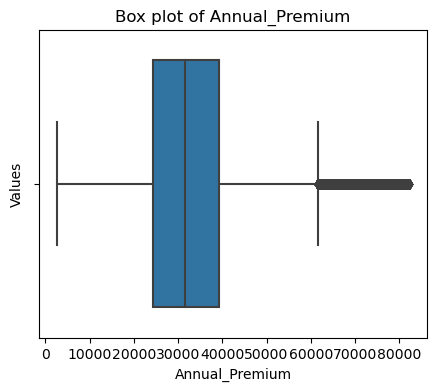

In [109]:
plot_boxplot(df=new_data, column_name='Annual_Premium')

**Correlation matrix**

C:\Users\lenovo\AppData\Local\Temp\ipykernel_35312\359882901.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(), annot=True, cmap = "coolwarm")


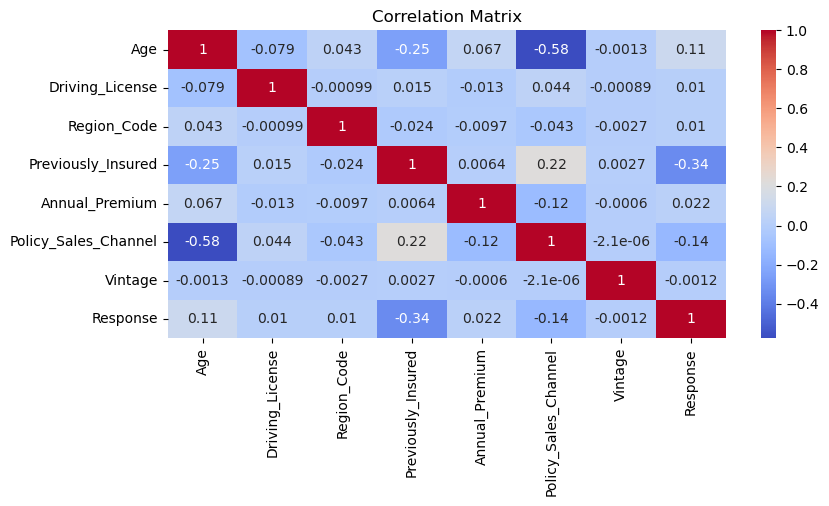

In [132]:
# Increase the size of the plot
plt.figure(figsize=(9, 4))  

# Create the correlation matrix plot using seaborn's heatmap
sns.heatmap(new_data.corr(), annot=True, cmap = "coolwarm")

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [137]:
new_data.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28,3,28,11,41
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454,33536,38294,28619,27496
Policy_Sales_Channel,26,26,26,152,152
Vintage,217,183,27,203,39


In [139]:
data.shape

(381109, 11)

In [138]:
new_data.shape

(379026, 11)

# Export the Data

In [140]:
new_data.to_csv("modelling-data-final.csv", index = False)

## Turn Categorical Features into numbers 
**We are using OneHotEncoder**
> Before that we will split the data into X and y

**Split into X & y**

In [112]:
# X_1 = data.drop("Response", axis=1)
# y_1 = data["Response"]

In [113]:
# # X Before transforming
# X_1.head().T

In [114]:
# # Name the categorical features in a list
# categorical_features = ["Gender", "Vehicle_Age", "Vehicle_Damage" ]

# # Instantiate OneHotEncoder and ColumnTransformer 
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
#                                 remainder = "passthrough")

# # Converting features
# transformed_X = transformer.fit_transform(X_1)

In [115]:
# # X After transforming
# (pd.DataFrame(transformed_X)).head().T

In [116]:
# dummies = pd.get_dummies(data[["Gender", "Vehicle_Age", "Vehicle_Damage"]])
# dummies.head(11).T